# "Inflation rates 1980 - 2020 by IMF"
> "Inflation rates for all countries in percent collected by IMF"

- toc:true
- branch: master
- badges: true
- comments: true
- author: <a href=https://github.com/claudia-chehade/>Claudia Chehade</a>
- image: images/m1_m2_m3_small.png
- categories: [Inflation, Hyperinflation]

In [1]:
#hide
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ecb_utils as ecb

In [2]:
#hide
df_imf_data = pd.read_csv('data\WEOApr2020all.csv', thousands=',')

In [3]:
#hide
code_gdp_constant_prices = 'NGDP_RPCH'
code_gdp_current_prices = 'PPPGDP'
code_gdp_capita = 'NGDPRPPPPCPCH'
code_avg_inflation = 'PCPIPCH'
code_end_period_inflation = 'PCPIEPCH'
code_unemploy = 'LUR'
code_lending_gov = 'GGXCNL_NGDP'
code_account_balance = 'BCA_NGDPD'

In [4]:
#hide
def transform(df_data):
    """ Switch lines and columns
    
    Parameters:
    df_data (data frame): data frame to be transformed by switching lines and columns
    
    Return:
    dataframe with exchanged lines and columns
    """
        
    df_data = df_data.transpose()
    df_data.rename(columns=df_data.iloc[0], inplace=True)
    df_data.drop(df_data.index[0], inplace=True)
    return df_data

In [5]:
#hide
df_imf_data.rename(columns={'WEO Subject Code':'code',
                           'WEO Country Code':'country_id',
                           'ISO':'iso',
                           'Country':'country',
                           'Subject Notes':'notes',
                           'Subject Descriptor':'descriptor',
                           'Units':'units',
                           'Scale':'scale',
                           'Country/Series-specific Notes':'source',
                           'Estimates Start After':'estimates'}, inplace=True)

In [6]:
#hide
df_imf_data.shape[0]
df_imf_data.columns

Index(['country_id', 'iso', 'code', 'country', 'descriptor', 'notes', 'units',
       'scale', 'source', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       'estimates'],
      dtype='object')

In [7]:
#hide
df_imf_countries_inflation = df_imf_data[df_imf_data['descriptor']=='Inflation, average consumer prices']
df_imf_countries_inflation

,country_id,iso,code,country,descriptor,notes,units,scale,source,1980,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,estimates
3,512,AFG,PCPIPCH,Afghanistan,"Inflation, average consumer prices",Annual percentages of average consumer prices ...,Percent change,NaN,Source: National Statistics Office Latest actu...,NaN,...,7.386,4.674,-0.662,4.384,4.976,0.626,2.302,4.711,4.451,2018.0
11,914,ALB,PCPIPCH,Albania,"Inflation, average consumer prices",Annual percentages of average consumer prices ...,Percent change,NaN,Source: National Statistics Office Latest actu...,NaN,...,1.925,1.613,1.868,1.282,1.987,2.029,1.411,2.39,2.750,2019.0
19,612,DZA,PCPIPCH,Algeria,"Inflation, average consumer prices",Annual percentages of average consumer prices ...,Percent change,NaN,Source: National Statistics Office Latest actu...,9.668,...,3.255,2.917,4.784,6.398,5.591,4.270,1.952,3.5,3.700,2019.0
27,614,AGO,PCPIPCH,Angola,"Inflation, average consumer prices",Annual percentages of average consumer prices ...,Percent change,NaN,Source: National Statistics Office Latest actu...,46.708,...,8.782,7.298,9.159,30.694,29.844,19.629,17.079,20.719,22.282,2019.0
35,311,ATG,PCPIPCH,Antigua and Barbuda,"Inflation, average consumer prices",Annual percentages of average consumer prices ...,Percent change,NaN,Source: Central Bank Latest actual data: 2018 ...,18.999,...,1.059,1.089,0.969,-0.489,2.432,1.210,1.380,1.443,1.685,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515,299,VEN,PCPIPCH,Venezuela,"Inflation, average consumer prices",Annual percentages of average consumer prices ...,Percent change,NaN,Source: Central Bank Latest actual data: 2019 ...,21.355,...,40.639,62.169,121.738,254.949,438.117,65374.080,19906.020,"15,000.00",15000.000,2019.0
1523,582,VNM,PCPIPCH,Vietnam,"Inflation, average consumer prices",Annual percentages of average consumer prices ...,Percent change,NaN,Source: National Statistics Office Latest actu...,25.156,...,6.595,4.085,0.631,2.668,3.521,3.540,2.797,3.2,3.900,2018.0
1531,474,YEM,PCPIPCH,Yemen,"Inflation, average consumer prices",Annual percentages of average consumer prices ...,Percent change,NaN,Source: National Statistics Office. Central Ba...,NaN,...,10.968,8.159,22.000,21.300,30.400,27.600,10.000,26.7,5.000,2017.0
1539,754,ZMB,PCPIPCH,Zambia,"Inflation, average consumer prices",Annual percentages of average consumer prices ...,Percent change,NaN,Source: National Statistics Office Latest actu...,11.729,...,6.978,7.811,10.107,17.869,6.577,6.993,9.800,13.4,12.050,2019.0


In [8]:
#hide
df_imf_data.head(10)

,country_id,iso,code,country,descriptor,notes,units,scale,source,1980,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,estimates
0,512,AFG,NGDP_RPCH,Afghanistan,"Gross domestic product, constant prices",Annual percentages of constant price GDP are y...,Percent change,NaN,Source: National Statistics Office Latest actu...,NaN,...,5.683,2.697,0.988,2.164,2.889,2.664,3.037,-3.007,4.495,2018.0
1,512,AFG,PPPGDP,Afghanistan,"Gross domestic product, current prices",These data form the basis for the country weig...,Purchasing power parity; international dollars,Billions,Source: National Statistics Office Latest actu...,NaN,...,60.181,62.948,64.231,66.301,69.501,73.091,76.624,74.792,79.678,2018.0
2,512,AFG,NGDPRPPPPCPCH,Afghanistan,"Gross domestic product per capita, constant pr...",GDP is expressed in constant international dol...,Purchasing power parity; percent change,NaN,Source: National Statistics Office Latest actu...,NaN,...,2.236,-0.521,-1.941,-0.547,0.358,1.268,1.654,-4.291,3.063,2018.0
3,512,AFG,PCPIPCH,Afghanistan,"Inflation, average consumer prices",Annual percentages of average consumer prices ...,Percent change,NaN,Source: National Statistics Office Latest actu...,NaN,...,7.386,4.674,-0.662,4.384,4.976,0.626,2.302,4.711,4.451,2018.0
4,512,AFG,PCPIEPCH,Afghanistan,"Inflation, end of period consumer prices",Annual percentages of end of period consumer ...,Percent change,NaN,Source: National Statistics Office Latest actu...,NaN,...,7.241,1.487,1.131,4.588,3.041,0.755,2.773,4.5,5.000,2018.0
5,512,AFG,LUR,Afghanistan,Unemployment rate,Unemployment rate can be defined by either the...,Percent of total labor force,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,512,AFG,GGXCNL_NGDP,Afghanistan,General government net lending/borrowing,Net lending (+)/ borrowing (?) is calculated a...,Percent of GDP,NaN,Source: Ministry of Finance or Treasury Latest...,NaN,...,-0.631,-1.719,-1.378,0.118,-0.630,1.502,-0.983,-4,-2.007,2018.0
7,512,AFG,BCA_NGDPD,Afghanistan,Current account balance,Current account is all transactions other than...,Percent of GDP,NaN,Source: Various sources: Central Statistical O...,NaN,...,1.444,6.549,3.709,8.375,7.087,12.986,8.591,4.898,5.753,2018.0
8,914,ALB,NGDP_RPCH,Albania,"Gross domestic product, constant prices",Annual percentages of constant price GDP are y...,Percent change,NaN,Source: IMF Staff Estimates Latest actual data...,2.684,...,1.002,1.774,2.219,3.315,3.802,4.071,2.214,-5.006,8.000,2018.0
9,914,ALB,PPPGDP,Albania,"Gross domestic product, current prices",These data form the basis for the country weig...,Purchasing power parity; international dollars,Billions,Source: IMF Staff Estimates Latest actual data...,5.563,...,30.398,31.510,32.545,33.972,35.928,38.301,39.832,38.078,41.926,2018.0


In [9]:
#hide
def all_columns_to_float(df_data):
    #for column in df_data.columns:
        #print(f'{df_data[column]} column type: {type(df_data[column])}')
        #df_data[column] = df_data[column].astype(float)
    df_data.iloc[:,:].str.replace(',', '').astype(float)

In [10]:
#hide
def plot_country(df_data, country=None):
    if country:
        df_country = df_data[df_data['country']==country].copy()
        df_country.drop(['country_id', 'iso', 'country', 'notes', 'source', 'units', 'scale', 'code', 'estimates'], axis=1, inplace=True)
    else:
        df_country = df_data.copy()
        df_country.drop(['country_id', 'iso', 'descriptor', 'notes', 'source', 'units', 'scale', 'code', 'estimates'], axis=1, inplace=True)
    
    df_country = transform(df_country)
    df_country.fillna(0, inplace=True)
    df_country.rename(columns={'Gross domestic product, constant prices':'gdp_constant',
                               'Gross domestic product, current prices':'gdp_current',
                               'Gross domestic product per capita, constant prices':'gdp_capita',
                               'Inflation, average consumer prices':'inflation_avg',
                               'Inflation, end of period consumer prices':'inflation_period',
                               'Unemployment rate':'unemployment',
                               'General government net lending/borrowing':'lending',
                               'Current account balance':'balance'}, inplace=True)
    return df_country
    all_columns_to_float(df_country)   
    #df_country.plot();
    # die Kurven in einzelne diagramme packen, wegen der unterschiedlichen Skala
    return df_country

In [11]:
#hide
df_inflation_all = plot_country(df_imf_countries_inflation)
df_inflation_all.dtypes

Afghanistan            object
Albania                object
Algeria                object
Angola                 object
Antigua and Barbuda    object
                        ...  
Venezuela              object
Vietnam                object
Yemen                  object
Zambia                 object
Zimbabwe               object
Length: 194, dtype: object

In [12]:
#hide
# remove commata and non values '--' otherwise conversion to float is not possible
for column in df_inflation_all.columns:
    print('column to be converted to float', column)
    df_inflation_all[column] = df_inflation_all[column].apply(lambda x: x.replace(',', '') if isinstance(x, str) else x)
    df_inflation_all[column] = df_inflation_all[column].apply(lambda x: x.replace('--', '0') if isinstance(x, str) else x)
    df_inflation_all[column].astype(float)

column to be converted to float Afghanistan
column to be converted to float Albania
column to be converted to float Algeria
column to be converted to float Angola
column to be converted to float Antigua and Barbuda
column to be converted to float Argentina
column to be converted to float Armenia
column to be converted to float Aruba
column to be converted to float Australia
column to be converted to float Austria
column to be converted to float Azerbaijan
column to be converted to float The Bahamas
column to be converted to float Bahrain
column to be converted to float Bangladesh
column to be converted to float Barbados
column to be converted to float Belarus
column to be converted to float Belgium
column to be converted to float Belize
column to be converted to float Benin
column to be converted to float Bhutan
column to be converted to float Bolivia
column to be converted to float Bosnia and Herzegovina
column to be converted to float Botswana
column to be converted to float Brazil
c

In [13]:
#hide
df_inflation_all = df_inflation_all.iloc[:,:].astype(float)
df_inflation_all

,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
1980,0.000,0.000,9.668,46.708,18.999,0.000,0.000,0.000,10.136,6.325,...,16.849,13.502,63.475,0.000,11.240,21.355,25.156,0.000,11.729,0.000
1981,0.000,0.000,14.610,1.391,11.465,0.000,0.000,0.000,9.488,6.807,...,12.189,10.378,34.046,0.000,26.846,16.244,69.600,0.000,13.997,5.556
1982,0.000,0.000,6.593,1.833,4.170,0.000,0.000,0.000,11.352,5.440,...,8.511,6.158,18.991,0.000,6.673,9.607,95.401,0.000,12.495,0.590
1983,0.000,0.000,7.835,1.833,2.346,0.000,0.000,0.000,10.039,3.335,...,5.198,3.160,49.198,0.000,1.653,6.242,49.487,0.000,19.692,-8.452
1984,0.000,0.000,6.310,1.833,3.844,0.000,0.000,0.000,3.960,5.665,...,4.448,4.368,55.305,0.000,5.516,12.250,64.897,0.000,20.019,-1.857
1985,0.000,0.000,10.432,1.833,0.996,0.000,0.000,0.000,6.735,3.190,...,5.160,3.528,72.222,0.000,1.066,11.382,91.602,0.000,37.430,-16.010
1986,0.000,0.000,14.007,1.833,0.500,0.000,0.000,0.000,9.050,1.737,...,3.626,1.944,76.380,0.000,4.766,11.544,453.538,0.000,54.800,10.666
1987,0.000,0.000,5.857,1.833,3.602,0.000,0.000,0.000,8.533,1.408,...,4.066,3.578,63.567,0.000,16.039,28.137,360.357,0.000,47.028,12.785
1988,0.000,0.000,5.938,1.833,6.800,0.000,0.000,0.000,7.270,1.868,...,4.612,4.100,62.192,0.000,8.760,29.468,374.354,0.000,54.042,-1.057
1989,0.000,0.000,9.172,1.833,4.362,0.000,0.000,0.000,7.580,2.249,...,5.216,4.791,80.447,0.000,7.748,84.463,95.770,0.000,128.294,-3.847


In [14]:
#hide
df_inflation_all.dtypes

Afghanistan            float64
Albania                float64
Algeria                float64
Angola                 float64
Antigua and Barbuda    float64
                        ...   
Venezuela              float64
Vietnam                float64
Yemen                  float64
Zambia                 float64
Zimbabwe               float64
Length: 194, dtype: object

In [15]:
#hide
df_inflation_all.max(axis=0)

Afghanistan               35.663
Albania                  225.996
Algeria                   31.700
Angola                  4146.010
Antigua and Barbuda       18.999
                         ...    
Venezuela              65374.080
Vietnam                  453.538
Yemen                     71.277
Zambia                   183.263
Zimbabwe                 319.036
Length: 194, dtype: float64

In [16]:
#hide
df_inflation_all.describe()

,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,...,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,3.593714,11.833500,8.437381,266.197762,3.107452,5.716786,221.337405,1.450905,3.932714,2.360571,...,3.485429,3.138833,29.697024,68.896095,4.130643,2790.189810,48.252643,15.912810,34.577714,16.356524
std,7.536170,36.991535,8.044069,773.618514,3.368754,11.069469,984.145799,2.222399,2.977986,1.473603,...,3.157688,2.390707,30.020974,254.371618,4.680577,10812.553939,102.195728,18.668786,41.946085,70.811361
min,-6.811000,-0.180000,0.300000,1.391000,-0.550000,-1.167000,-1.406000,-2.372000,0.225000,0.405000,...,0.040000,-0.320000,4.366000,0.000000,0.799000,6.242000,-1.768000,0.000000,6.575000,-72.729000
25%,0.000000,0.009750,3.753250,7.669000,1.252500,0.000000,0.000000,0.000000,1.826250,1.520250,...,1.548000,1.976250,7.878250,0.000000,1.784250,19.291500,3.944750,0.918750,10.923500,-3.634750
50%,0.000000,2.133500,5.645500,18.354000,2.377000,0.000000,1.909000,0.448500,2.742500,2.031500,...,2.505500,2.811000,10.224000,11.800000,2.650500,30.279500,8.364000,10.838000,19.008500,0.483000
75%,4.701750,3.409750,9.247000,105.126500,3.565750,9.439000,5.479250,3.149000,4.552250,3.031750,...,4.394000,3.487750,52.860250,16.775500,4.643500,60.593500,37.286500,20.861000,36.798750,5.893500
max,35.663000,225.996000,31.700000,4146.010000,18.999000,53.548000,5273.450000,8.957000,11.352000,6.807000,...,16.849000,13.502000,112.526000,1568.330000,26.846000,65374.080000,453.538000,71.277000,183.263000,319.036000


In [17]:
#hide
countries_hyperinflation = df_inflation_all.max(axis=0)>11000
countries_hyperinflation = list(countries_hyperinflation.where(countries_hyperinflation==True).dropna().index)

countries_highinflation = df_inflation_all.max(axis=0).between(500, 11000, inclusive=True)
countries_highinflation = list(countries_highinflation.where(countries_highinflation==True).dropna().index)

countries_mediuminflation = df_inflation_all.max(axis=0).between(50, 500, inclusive=True)
countries_mediuminflation = list(countries_mediuminflation.where(countries_mediuminflation==True).dropna().index)

countries_moderateinflation = df_inflation_all.max(axis=0).between(20, 50, inclusive=True)
countries_moderateinflation = list(countries_moderateinflation.where(countries_moderateinflation==True).dropna().index)

countries_lowinflation = df_inflation_all.max(axis=0).between(10, 20, inclusive=True)
countries_lowinflation = list(countries_lowinflation.where(countries_lowinflation==True).dropna().index)

countries_mininflation = df_inflation_all.max(axis=0).between(5, 10, inclusive=True)
countries_mininflation = list(countries_mininflation.where(countries_mininflation==True).dropna().index)

countries_noninflation = df_inflation_all.max(axis=0)<5
countries_noninflation = list(countries_noninflation.where(countries_noninflation==True).dropna().index)

countries_hyperinflation, len(countries_hyperinflation)

(['Bolivia', 'Democratic Republic of the Congo', 'Nicaragua', 'Venezuela'], 4)

In [18]:
#hide
df_hyperinflation = df_inflation_all[countries_hyperinflation]
df_highinflation = df_inflation_all[countries_highinflation]
df_mediuminflation = df_inflation_all[countries_mediuminflation]
df_moderateinflation = df_inflation_all[countries_moderateinflation]
df_lowinflation = df_inflation_all[countries_lowinflation]
df_mininflation = df_inflation_all[countries_mininflation]

In [19]:
#hide
df_countries_hyperinflation = df_inflation_all[countries_hyperinflation]

In [20]:
#hide
df_zimbabwe = plot_country(df_imf_data, 'Brazil')
df_zimbabwe

,gdp_constant,gdp_current,gdp_capita,inflation_avg,inflation_period,unemployment,lending,balance
1980,9.19,580.908,9.433,90.227,0,0,0,-8.786
1981,-4.4,607.891,-6.49,101.737,95.655,0,0,-7.005
1982,0.596,649.295,-1.574,100.574,104.804,0,0,-9.107
1983,-3.4,651.783,-5.451,135.02,164,0,0,-4.761
1984,5.307,711.143,3.108,192.121,215.279,0,0,0.028
1985,7.901,791.598,5.689,226.029,242.248,0,0,-0.1
1986,7.544,868.458,5.408,147.137,79.656,0,0,-2.147
1987,3.601,921.982,1.627,228.327,363.414,0,0,-0.501
1988,0.264,957.019,-1.565,629.118,980.221,0,0,1.304
1989,3.2,1026.37,1.396,1430.72,1972.91,0,0,0.235


In [21]:
#hide
# imf consumer price index
#https://data.imf.org/?sk=4FFB52B2-3653-409A-B471-D47B46D904B5
# nicht klar, wo ich die Daten runterladen kann

<Figure size 432x288 with 0 Axes>

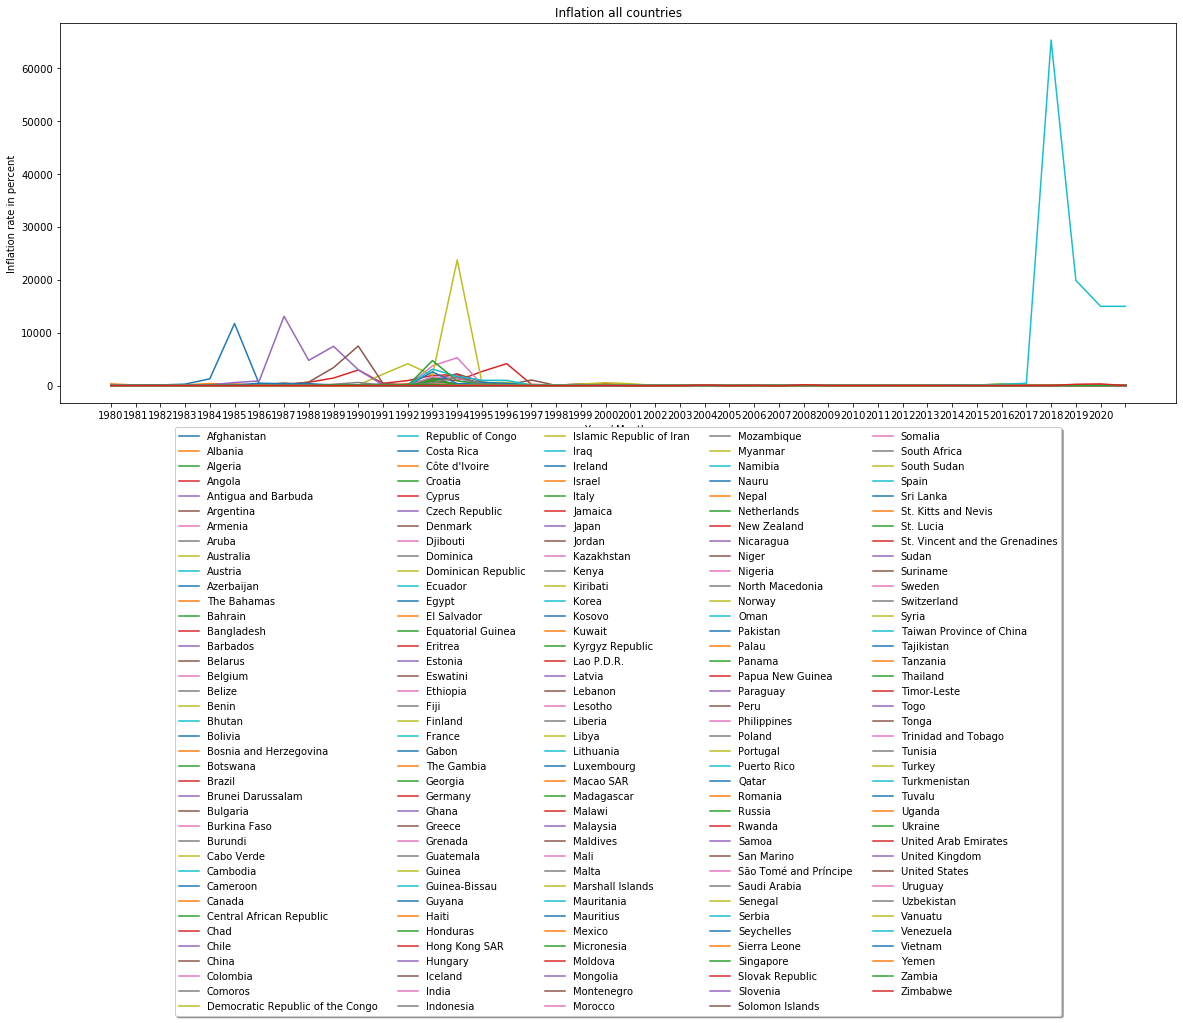

In [40]:
#hide
def plot(df_data, title):
    years = np.arange(1980, 2021, 1);
    plt.figure();
    ax = df_data.plot(kind='line', figsize=(20,7), title=title);
    plt.xlabel('Year / Months');
    plt.ylabel('Inflation rate in percent');
    plt.xticks(np.arange(0, df_data.shape[0], step=1), years);
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
              fancybox=True, shadow=True, ncol=5);
plot(df_inflation_all, 'Inflation all countries');

# Länder mit Hyperinflation (>11.000%)  seit 1980
- Hyperinflation ist nach Definition von Cagan eine Inflationsrate von über 13.000% jährlich (oder 50% monatlich) - 100% entsprechen einer Verdopplung der Preise oder einem Kaufkraftschwund auf die Hälfte.
- 1980 bis 2020 sind 4 Länder betroffen:
    - Bolivien 1984 bis 1986 (nur bis etwa 11.000%)
    - Nikaragua 1986 bis 1988
    - Demokratische Republik Kongo 1993 bis 1995
    - Venezuela 2017 andauernd

(Source: https://de.wikipedia.org/wiki/Hyperinflation#:~:text=Cagan%20aufgestellte%20Faustregel%20von%20monatlichen,mit%20extrem%20hoher%20monatlicher%20Rate)

- Da Bolivien mit einer Hyperinflation knapp um 11.000% unter der offiziellen Definition von Hyperinflation liegt, aber deutlich von den Ländern mit hoher Inflation abweicht, ist die Grenze für Hyperinflation im folgenden Diagramm auf 11.000% abgesenkt.

<Figure size 432x288 with 0 Axes>

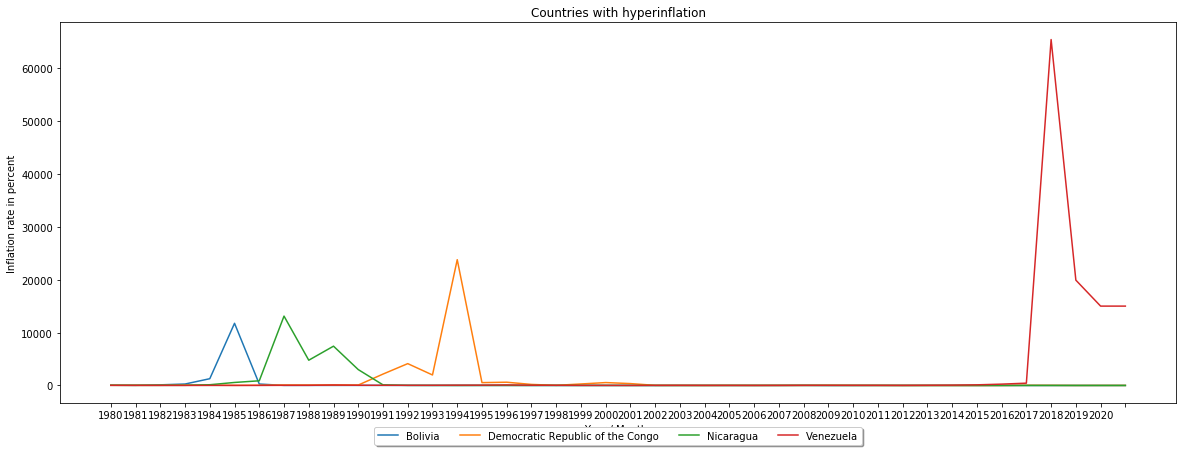

In [41]:
#hide
plot(df_hyperinflation, 'Countries with hyperinflation');

In [24]:
#hide
df_hyperinflation.index.rename('Years / Months', inplace=True)
df_hyperinflation

,Bolivia,Democratic Republic of the Congo,Nicaragua,Venezuela
Years / Months,,,,
1980,47.059,40.039,35.135,21.355
1981,32.134,34.884,23.800,16.244
1982,123.555,37.069,28.500,9.607
1983,275.579,76.730,33.600,6.242
1984,1281.350,52.630,141.300,12.250
1985,11749.630,23.460,571.400,11.382
1986,273.350,46.730,885.200,11.544
1987,14.579,90.370,13109.500,28.137
1988,16.002,82.749,4775.200,29.468


In [25]:
#hide
ecb.plot_time_series_with_vertical_selector(df_hyperinflation, 
                                            'Years / Months', 
                                            'Inflation rate in percent', 
                                            'Countries',
                                            700,
                                            500)

alt.LayerChart(...)

In [42]:
# hide-input
ecb.plot_altair_legend_selectable(df_hyperinflation, 
                                  'Years / Months', 
                                  'Inflation rate in percent', 
                                  'Countries',
                                   700,
                                   500)

alt.Chart(...)

# Länder mit hoher Inflation (500% bis 11.000%) seit 1980
- Länder mit hoher Inflation gehören hauptsächlich in zwei Gruppen:
    - Lateinamerikanische Länder in den Schuldenkrisen der 80er Jahre: Peru und Brasilien
    - ehemalige sozialistische Länder in den 90er Jahren
    
### Nebenbemerkung: 
Bei einer Inflationsrate von 500% kann sich der durchschnittliche Haushalt nur noch 1/6 der ursprünglichen Konsummenge leisten. Dabei muss man sich vor Augen führen, dass dies eine Verschlechterung relativ zu einem ohnehin schon niedrigem Ausgangsniveau ist. In den hier betrachteten Ländern liegt der höchste Wert über 7000%. Das entspricht einer drastischen Verarmung der Durchschnittsbevölkerung.

<Figure size 432x288 with 0 Axes>

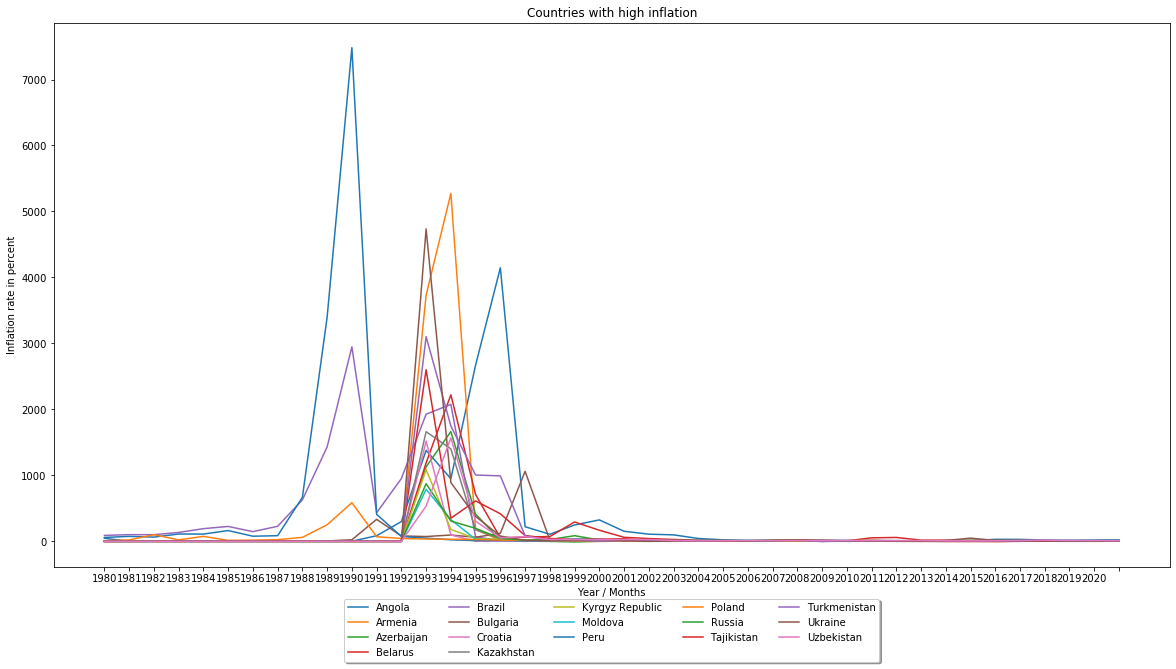

In [26]:
#hide
plot(df_highinflation, "Countries with high inflation");

In [27]:
#hide
df_highinflation.index.rename('Years / Months', inplace=True)

In [28]:
#hide
#df_highinflation

In [29]:
#hide
ecb.plot_time_series_with_vertical_selector(df_highinflation, 
                                            'Years / Months', 
                                            'Inflation rate in percent', 
                                            'Countries',
                                            700,
                                            500)

alt.LayerChart(...)

In [30]:
# hide-input
ecb.plot_altair_legend_selectable(df_highinflation, 
                                  'Years / Months', 
                                  'Inflation rate in percent', 
                                  'Countries',
                                   700,
                                   500)

alt.Chart(...)

## Länder mit mittlerer Inflation (50% bis 500%)
- Eine durchschnittliche Inflationsperiode dauert zwischen 2 und 5 Jahren.
- Hier müssten eignetlich Länder mit Episoden über 100% vom Rest getrennt werden.
- Hier müssten die Länder regional getrennt werden, um Krisenhäufungen zu unterscheiden.
- Hier fällt ein Land mit Deflationsepisoden auf, welches ist es?

### Nebenbemerkung: 
Bei einer Inflationsrate um 100% kann von einem jährlichen Einkommen nur noch die Hälfte der Ausgangsmenge an Gütern erworben werden. Bei einer Inflationsrate von 500% kann sich der durchschnittliche Haushalt nur noch 1/6 der ursprünglichen Konsummenge leisten. Das bedeutet drastische Einschnitte im Lebensniveau.

<Figure size 432x288 with 0 Axes>

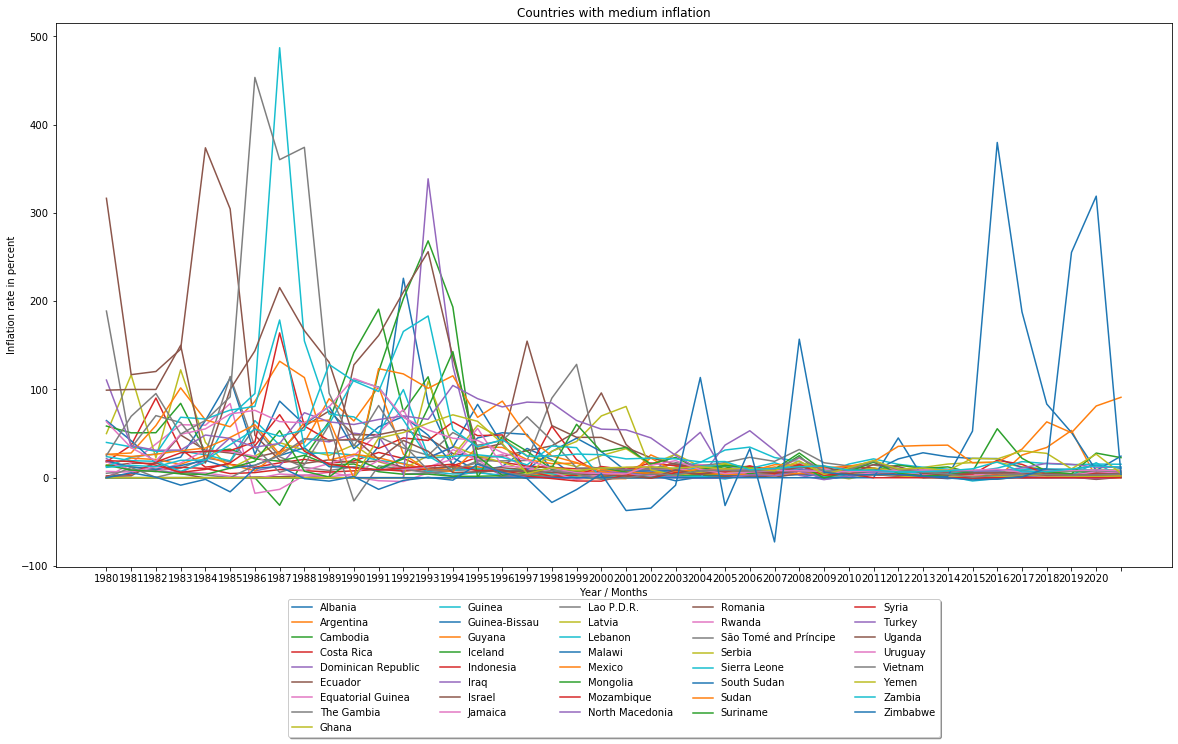

In [31]:
#hide
plot(df_mediuminflation, "Countries with medium inflation");

In [32]:
#hide-input
ecb.plot_altair_legend_selectable(df_mediuminflation, 
                                  'Years / Months', 
                                  'Inflation rate in percent', 
                                  'Countries',
                                   700,
                                   500)

alt.Chart(...)

## Länder mit moderater Inflation (20% bis 50%)
- Eine durchschnittliche Inflationperiode dauert zwischen 2 und 5 Jahren. (TODO: ausrechnen)
- Hier müssten die Länder regional getrennt werden, um Krisenhäufungen zu unterscheiden.
- Hier finden sich deutlich mehr Länder mit Deflationen.

### Nebenbemerkung: 
Eine Inflationsrate um 50% jährlich bedeutet einen Kaufkraftverlust um ein Viertel relativ zur Ausgangsmenge.


<Figure size 432x288 with 0 Axes>

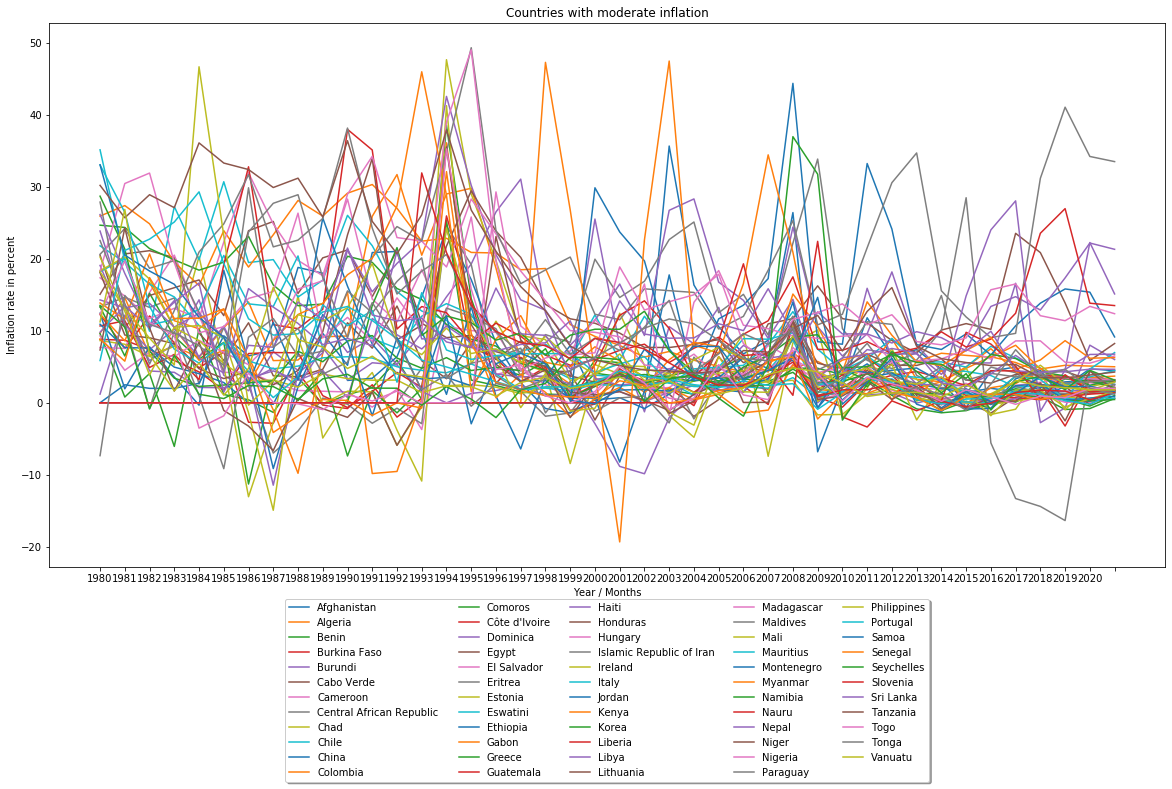

In [33]:
#hide
plot(df_moderateinflation, "Countries with moderate inflation");

In [34]:
#hide-input
ecb.plot_altair_legend_selectable(df_moderateinflation, 
                                  'Years / Months', 
                                  'Inflation rate in percent', 
                                  'Countries',
                                   700,
                                   500)

alt.Chart(...)

## Länder mit niedriger Inflation (10% bis 20%)
- Eine durchschnittliche Inflationsperiode dauert zwischen 2 und 5 Jahren, Kurven sind ausgeglichener.
- Einige wenige Länder weisen Deflationen auf.

### Nebenbemerkung: 
Eine Inflationsrate um 50% jährlich bedeutet einen Kaufkraftverlust um ein Viertel relativ zur Ausgangsmenge.

<Figure size 432x288 with 0 Axes>

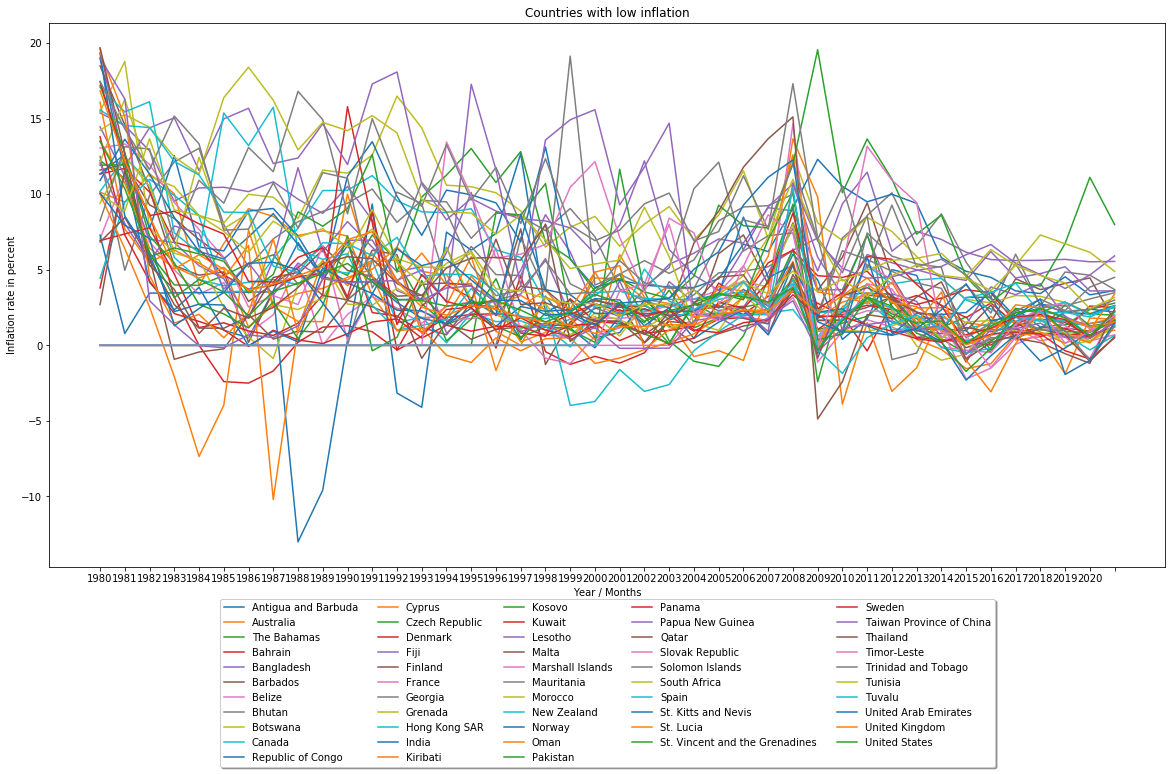

In [35]:
#hide
plot(df_lowinflation, "Countries with low inflation");

In [36]:
#hide-input
ecb.plot_altair_legend_selectable(df_lowinflation, 
                                  'Years / Months', 
                                  'Inflation rate in percent', 
                                  'Countries',
                                   700,
                                   500)

alt.Chart(...)

## Länder mit minimaler Inflation (bis 10%)
- Eine durchschnittliche Inflationsperiode dauert zwischen 2 und 5 Jahren, Kurven sind ausgeglichener.
- Deutlicher Niedergang der Inflationsraten Anfang bis Mitter der 80er Jahre (Volcker-Schock)
- Deflationsausschläge sind auch geringer.

<Figure size 432x288 with 0 Axes>

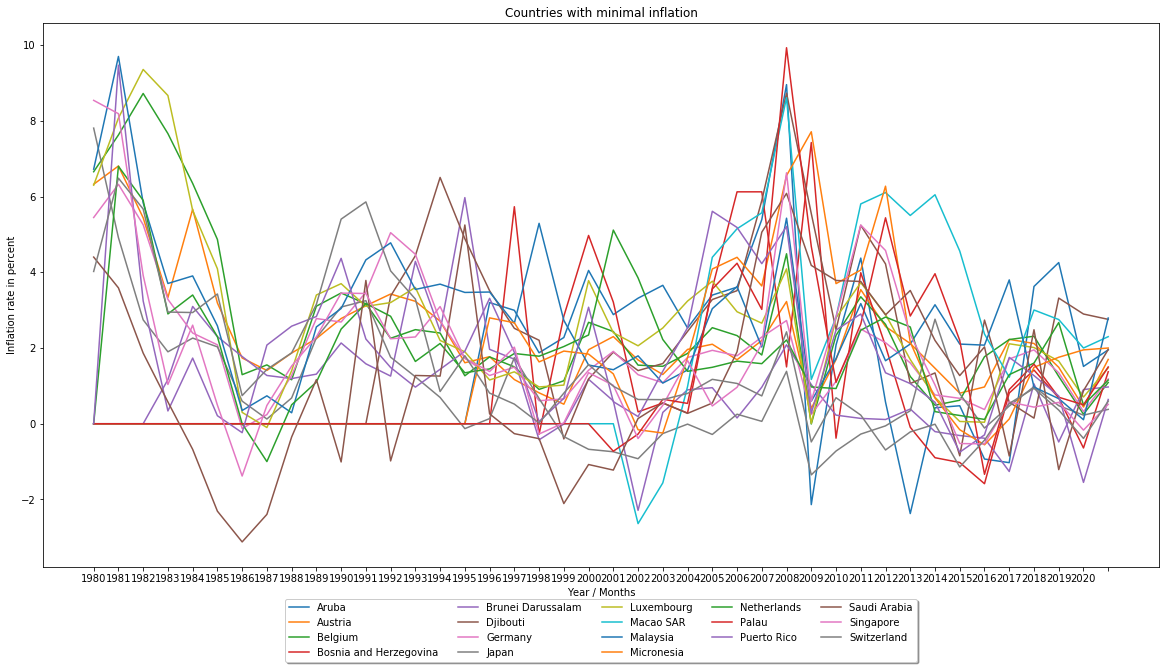

In [37]:
#hide
plot(df_mininflation, "Countries with minimal inflation");

In [38]:
#hide-input
ecb.plot_altair_legend_selectable(df_mininflation, 
                                  'Years / Months', 
                                  'Inflation rate in percent', 
                                  'Countries',
                                   700,
                                   500)

alt.Chart(...)

In [39]:
#hide-input
#plot(df_noninflation, "Countries with no inflation")